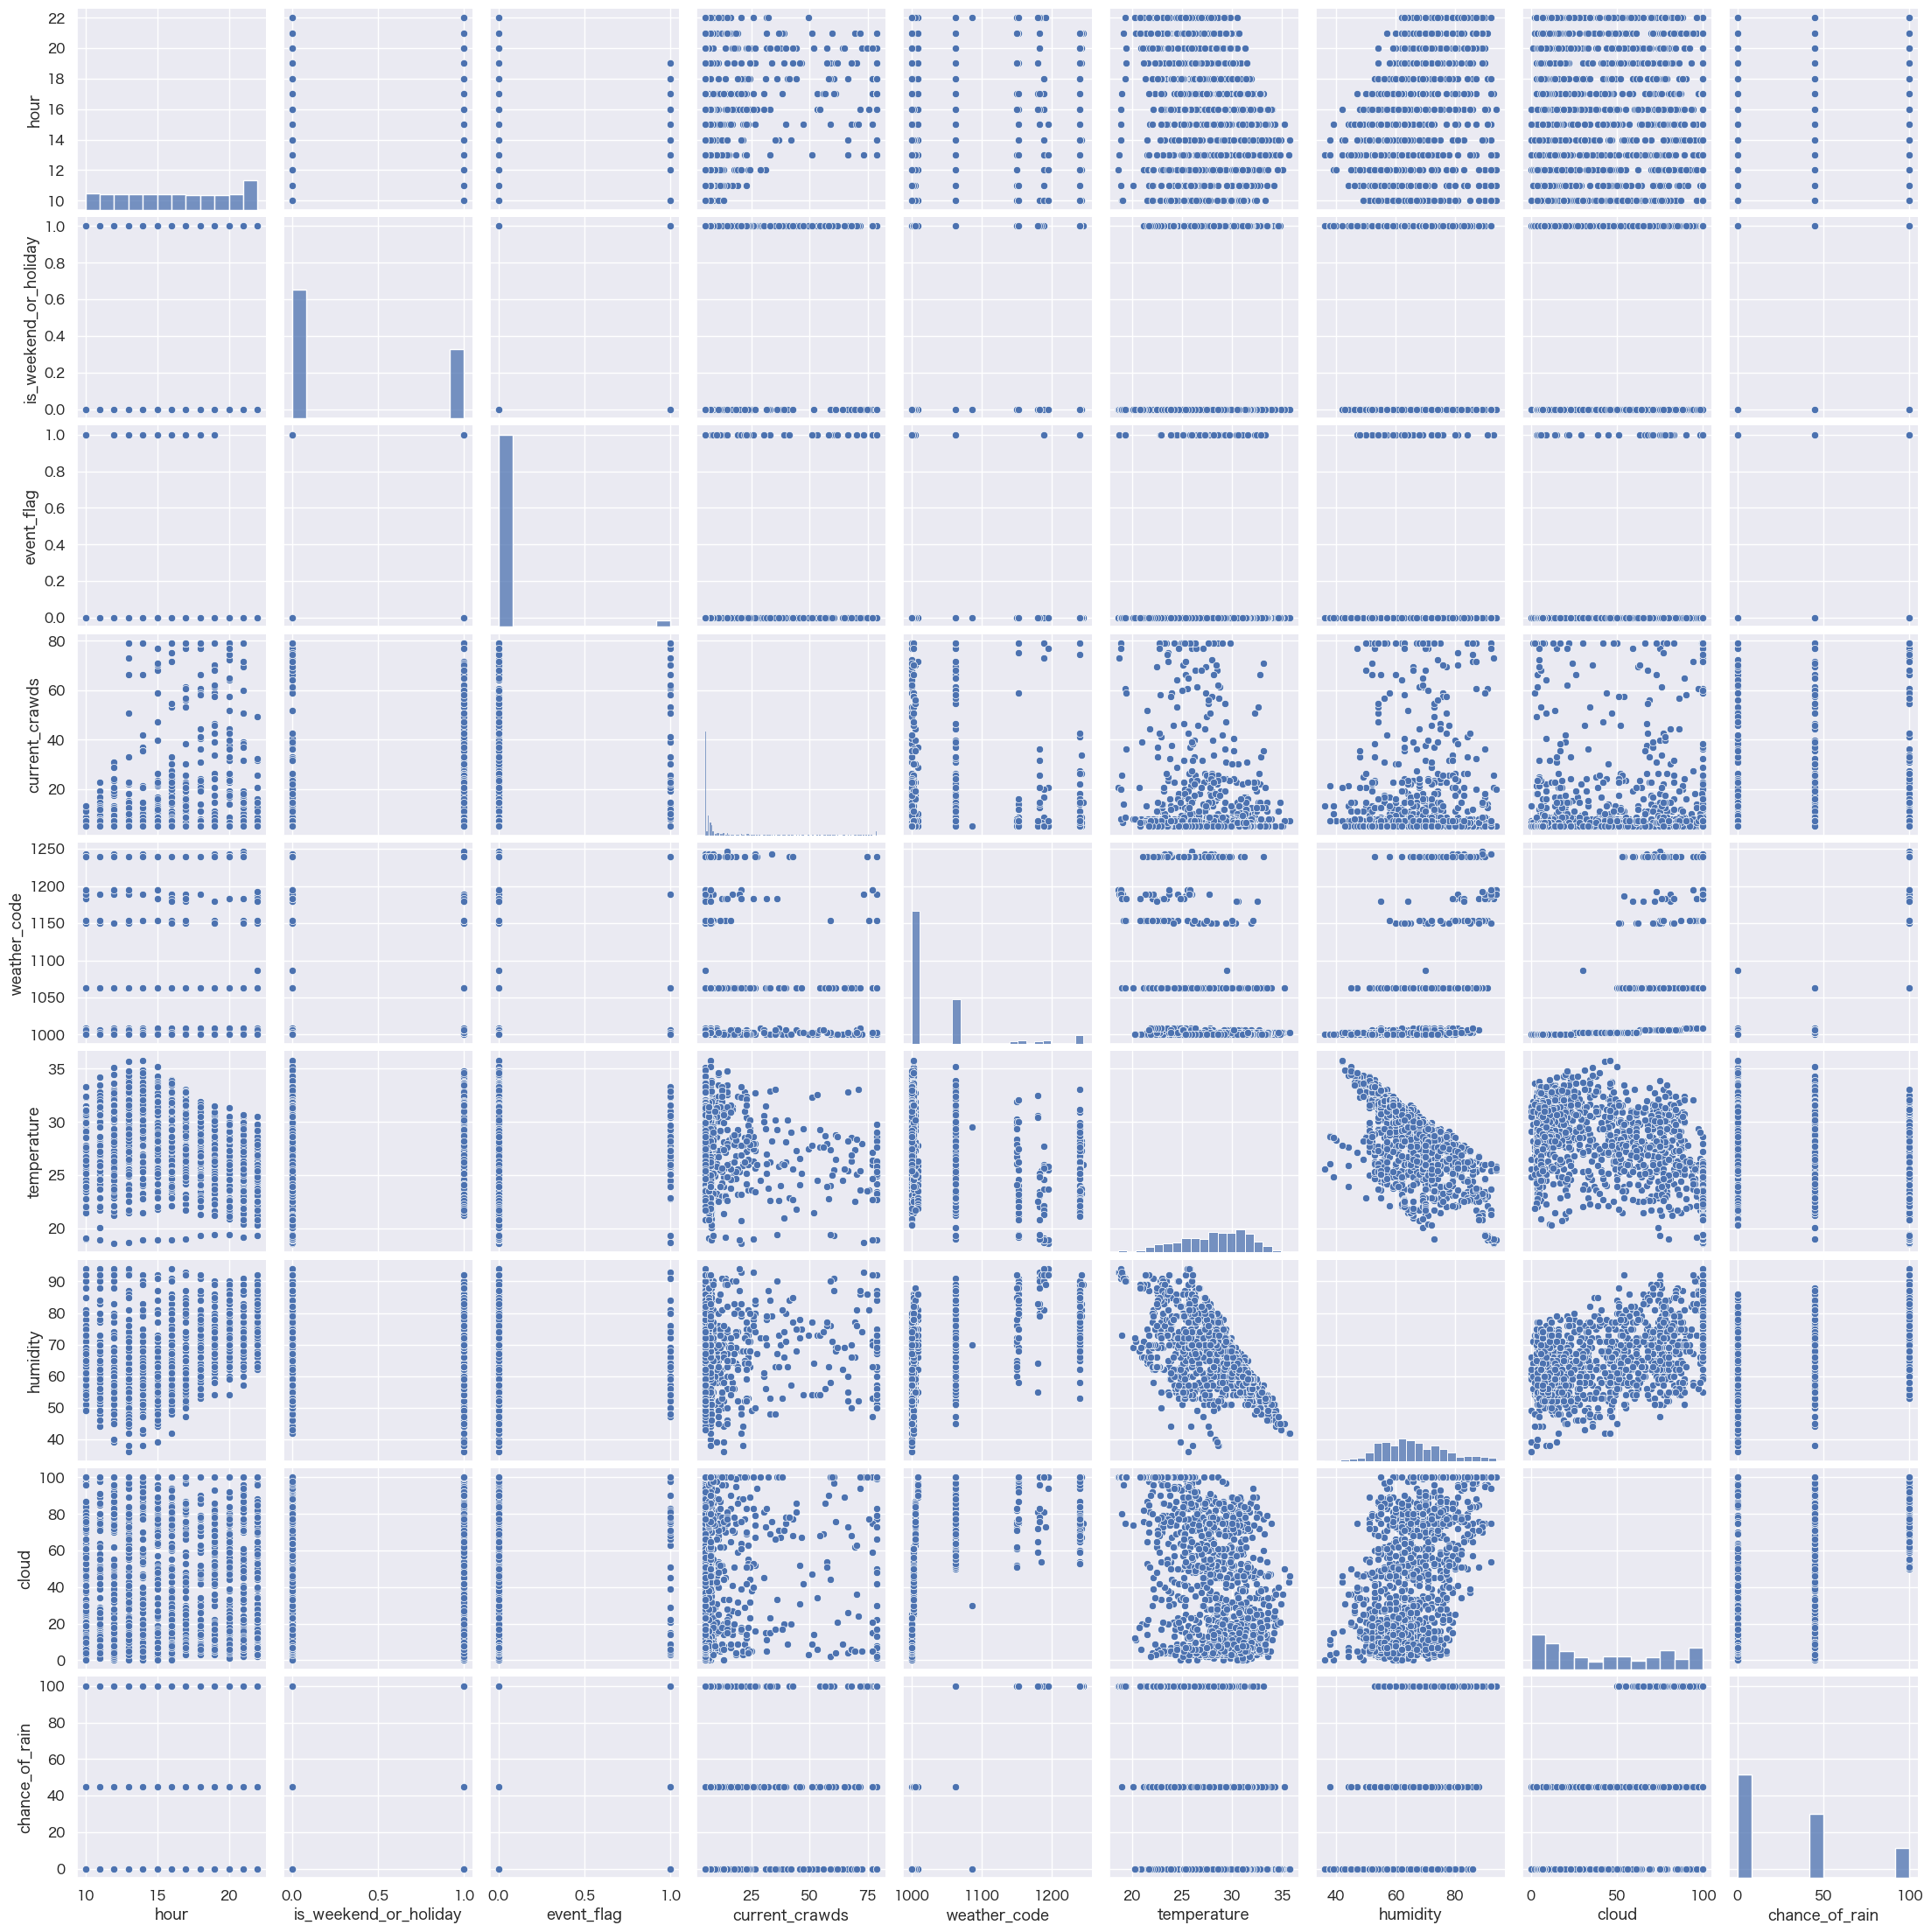

In [40]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 日本語フォントの設定
font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc'  # Macの場合の例
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# データの読み込み
df = pd.read_csv('output1.csv')
df.head()

# object型を削除
df = df.drop(columns = ['name','date'])

# hourカラムの前ゼロをつける処理
df['hour'] = df['hour'].apply(lambda x: x.zfill(5) if len(x) < 5 else x)
# hourカラムをint型に変換
df['hour'] = df['hour'].apply(lambda x: int(x.split(':')[0]))

pg = sns.pairplot(df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 302
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 8
[LightGBM] [Info] Start training from score 12.357541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[ 1.10416065 27.95155392  2.68201317  7.82583699  5.46596741  7.68506225
 20.64193057 10.89354749 14.02465395  9.35963329 14.46968409  3.13063977
 21.73408667  8.58951     6.3363917   6.9207254  11.15679681  6.12529977
 10.90090284 32.01875949  5.95852551 -1.12556187  6.5907855   1.8896015
  8.74194822  6.49872829  1.14203712 41.72238595 13.41594482  2.63622262
 10.1859

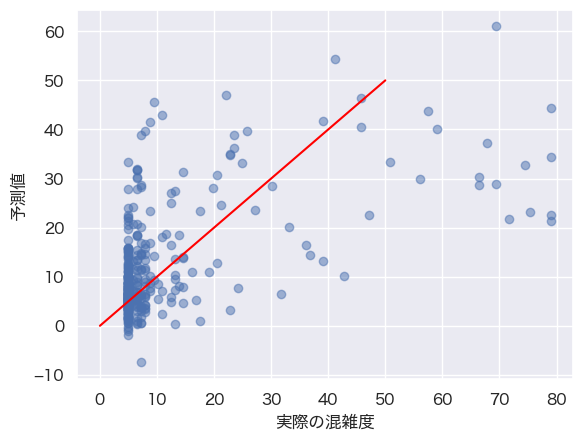

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

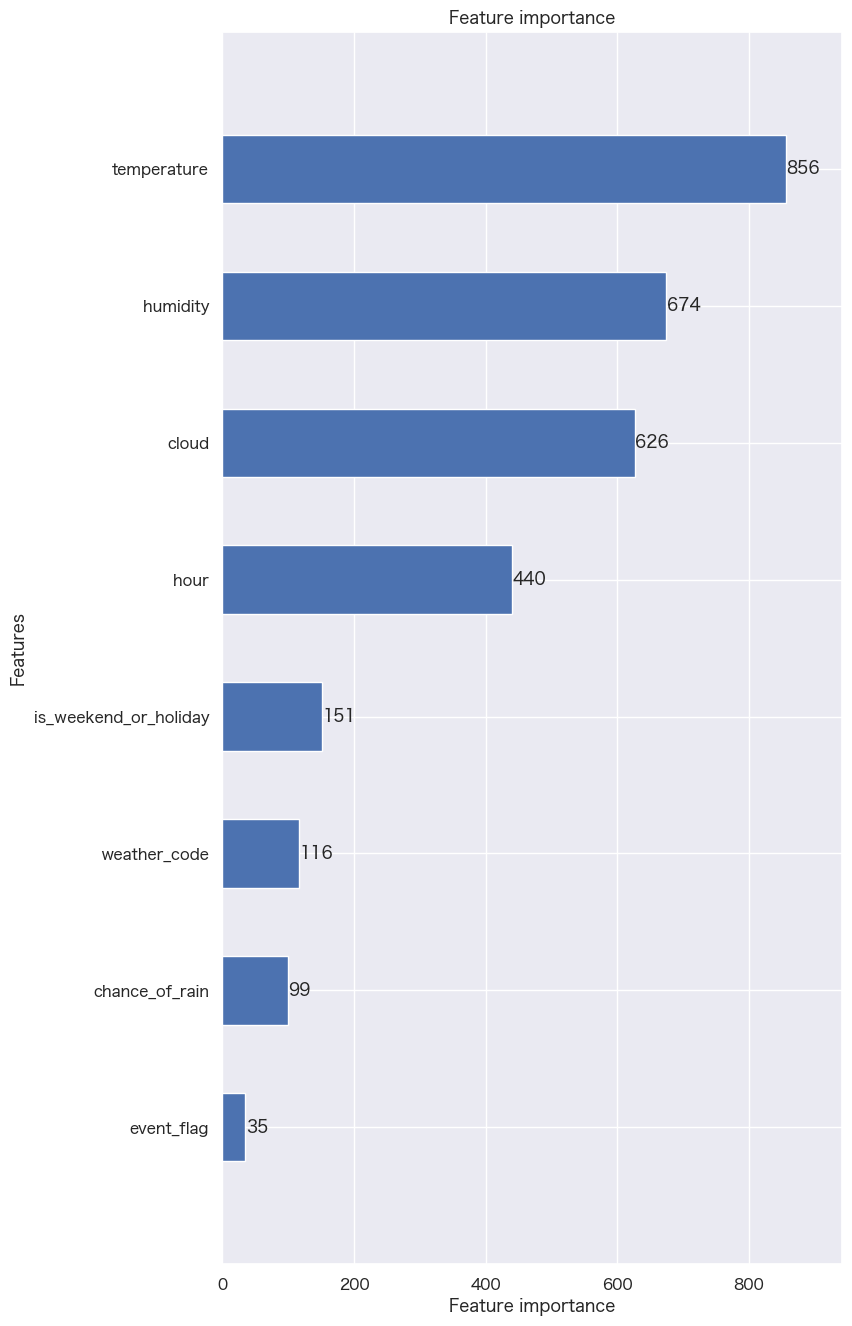

In [41]:
# 説明変数と目的変数に分ける
train_df = df.drop('current_crawds', axis=1)
target_df = df['current_crawds']

# モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)

# XGBoostで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

# モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

# 予測の実行と書き出し
pred = model.predict(X_test)

# 散布図で予測の精度を描写
sns.set(font=font_prop.get_name())
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 50, 100), np.linspace(0, 50, 100), "red")
plt.xlabel('実際の混雑度')
plt.ylabel('予測値')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 7
[LightGBM] [Info] Start training from score 12.166042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


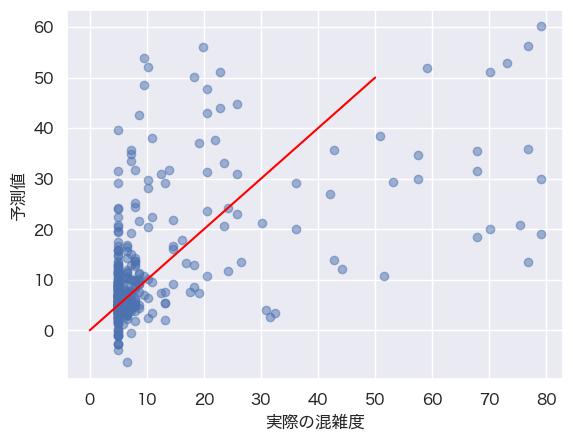

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

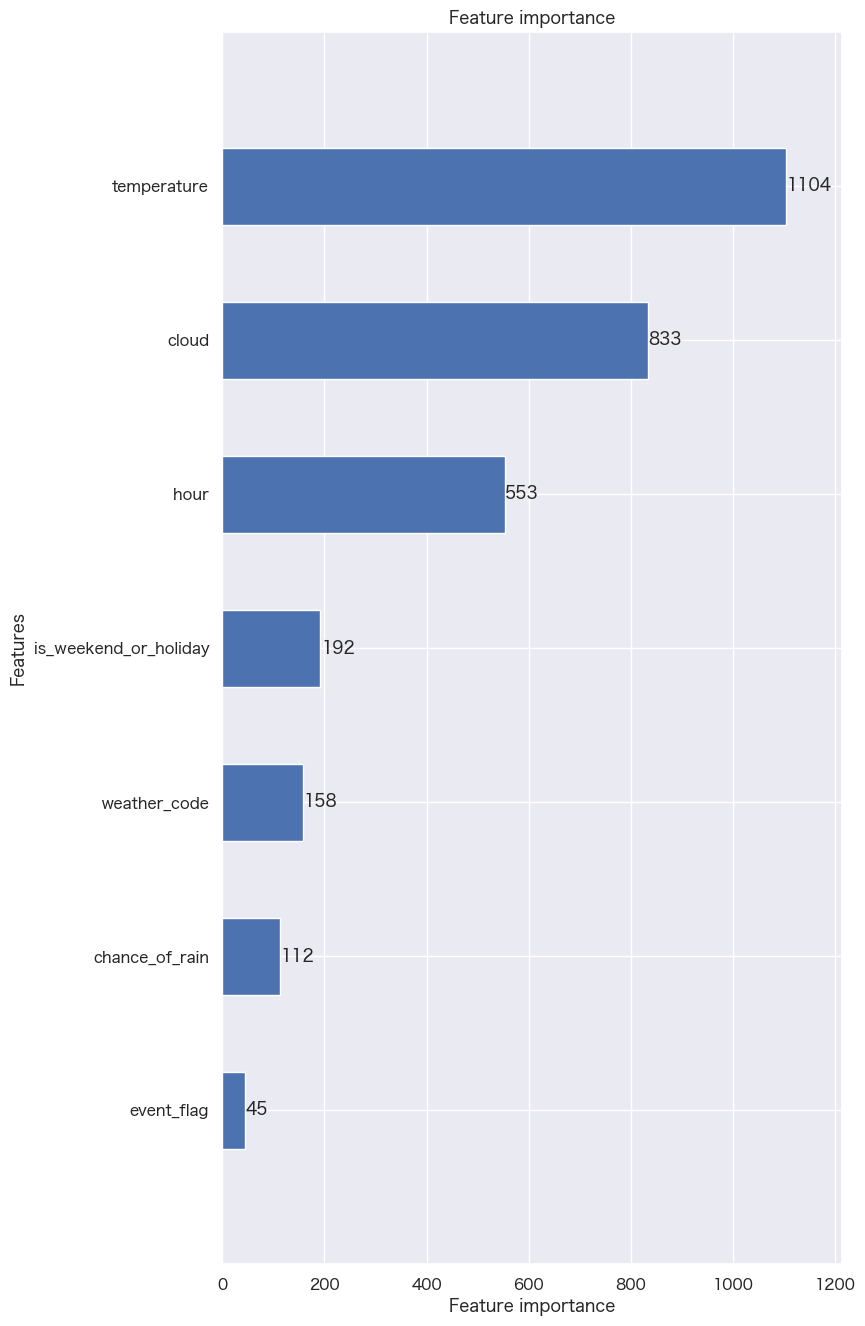

In [42]:
# object型を削除
df = df.drop(columns = ['humidity'])

# 説明変数と目的変数に分ける
train_df = df.drop('current_crawds', axis=1)
target_df = df['current_crawds']

# モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)

# XGBoostで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

# モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

# 予測の実行と書き出し
pred = model.predict(X_test)

# 散布図で予測の精度を描写
sns.set(font=font_prop.get_name())
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 50, 100), np.linspace(0, 50, 100), "red")
plt.xlabel('実際の混雑度')
plt.ylabel('予測値')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 10.5836	valid_1's rmse: 16.2436
Early stopping, best iteration is:
[130]	training's rmse: 10.1368	valid_1's rmse: 16.0604
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 11.0081	valid_1's rmse: 13.9277
Early stopping, best iteration is:
[71]	training's rmse: 11.7834	valid_1's rmse: 13.5005
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 11.1263	valid_1's rmse: 11.2967
Early stopping, best iteration is:
[73]	training's rmse: 11.8351	valid_1's rmse: 11.2398
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 10.6741	valid_1's rmse: 13.8427
Early stopping, best iteration is:
[128]	training's rmse: 10.3001	valid_1's rmse: 13.8092
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 10.5528	valid_1's rmse: 15.1587
Early stopping, best iteration is:
[61]	training's rmse: 11.47

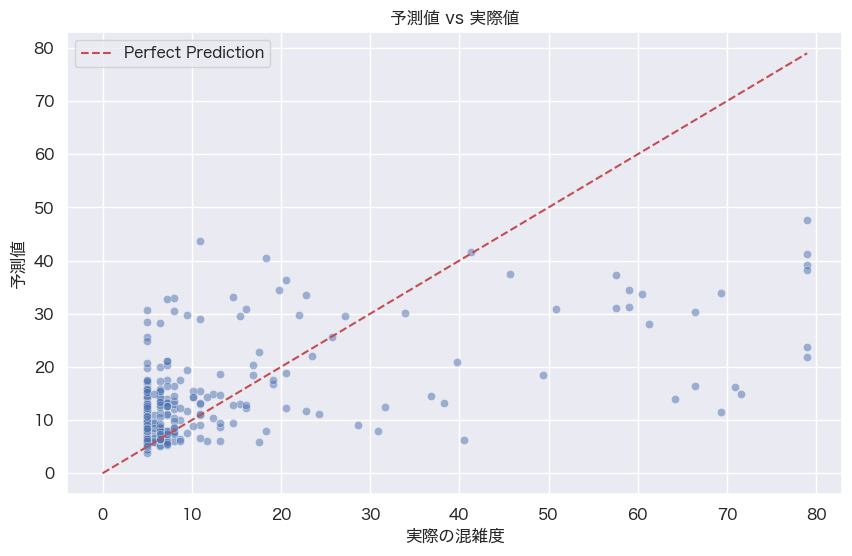

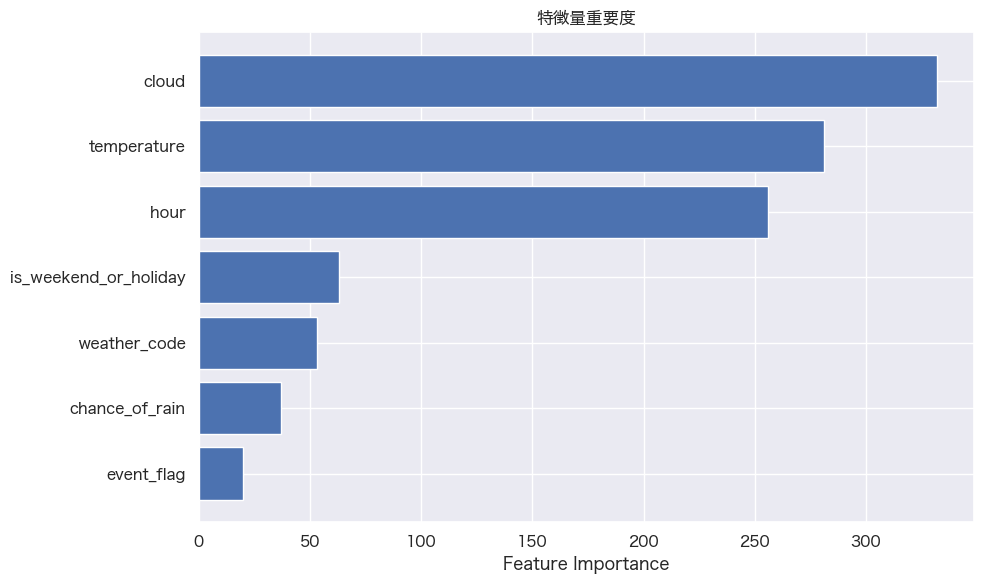

In [44]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 日本語フォントの設定
font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# データの前処理関数
def preprocess_data(df):
    # カラムの削除
    df = df.drop(columns=['name', 'date'])
    
    # hourカラムの処理
    df['hour'] = df['hour'].apply(lambda x: x.zfill(5) if len(x) < 5 else x)
    df['hour'] = df['hour'].apply(lambda x: int(x.split(':')[0]))
    
    ## 時間に関する特徴量エンジニアリング
    #df['is_weekend'] = df['week'].isin([6, 7]).astype(int)
    #df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if (9 <= x <= 11) or (17 <= x <= 19) else 0)
    
    # humidity列の削除
    df = df.drop(columns=['humidity'])
    
    return df

# モデルのパラメータ設定
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_child_samples': 20,
    'min_gain_to_split': 0.01,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'force_row_wise': True,
    'verbose': -1
}

def train_and_evaluate():
    # データの読み込みと前処理
    df = pd.read_csv('output1.csv')
    df = preprocess_data(df)
    
    # 説明変数と目的変数の分離
    X = df.drop('current_crawds', axis=1)
    y = df['current_crawds']
    
    # データのスケーリング
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    # トレーニングデータとテストデータの分割
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )
    
    # K-fold交差検証の準備
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # モデルの学習と評価
    cv_scores = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_val_fold = X_train.iloc[val_idx]
        y_val_fold = y_train.iloc[val_idx]
        
        dtrain = lgb.Dataset(X_train_fold, y_train_fold)
        dvalid = lgb.Dataset(X_val_fold, y_val_fold)
        
        # モデルの学習
        model = lgb.train(
            params,
            dtrain,
            num_boost_round=1000,
            valid_sets=[dtrain, dvalid],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=100)
            ]
        )
        
        # 検証データでの評価
        val_pred = model.predict(X_val_fold)
        val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_pred))
        cv_scores.append(val_rmse)
    
    print(f'Cross-validation RMSE scores: {cv_scores}')
    print(f'Average RMSE: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')
    
    # 最終モデルのトレーニング
    final_dtrain = lgb.Dataset(X_train, y_train)
    final_dvalid = lgb.Dataset(X_test, y_test)
    
    final_model = lgb.train(
        params,
        final_dtrain,
        num_boost_round=1000,
        valid_sets=[final_dtrain, final_dvalid],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100)
        ]
    )
    
    # テストデータでの予測と評価
    pred = final_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    
    print(f'\nTest RMSE: {test_rmse:.4f}')
    print(f'R2 Score: {r2:.4f}')
    
    # 予測結果の可視化
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=pred, alpha=0.5)
    max_val = max(max(y_test), max(pred))
    plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')
    plt.xlabel('実際の混雑度')
    plt.ylabel('予測値')
    plt.title('予測値 vs 実際値')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 特徴量重要度の可視化
    plt.figure(figsize=(10, 6))
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': final_model.feature_importance()
    })
    importance_df = importance_df.sort_values('importance', ascending=True)
    
    plt.barh(range(len(importance_df)), importance_df['importance'])
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Feature Importance')
    plt.title('特徴量重要度')
    plt.tight_layout()
    plt.show()
    
    return final_model, test_rmse, r2

# モデルの実行
model, rmse, r2 = train_and_evaluate()

# 必要なライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# データの読み込み
df = pd.read_csv('output1.csv')
df.head()

In [33]:
# データの読み込み
df = pd.read_csv('output1.csv')
df.head()

,date,hour,is_weekend_or_holiday,event_flag,name,current_crawds,weather_code,temperature,humidity,cloud,chance_of_rain
0,2024-06-07,20:00,0,0,NaN,51.62,1000,21.5,64,14,0
1,2024-06-07,21:00,0,0,NaN,39.04,1000,21.0,66,20,0
2,2024-06-07,22:00,0,0,NaN,20.54,1000,20.7,68,18,0
3,2024-06-08,10:00,1,0,NaN,13.14,1003,22.9,50,33,0
4,2024-06-08,11:00,1,0,NaN,13.14,1000,23.9,44,7,0


# データの前処理
df = df.dropna()
# 必要に応じて追加の前処理を行う

In [34]:
# データの前処理
#df = df.dropna()
df = df.drop(columns = ['name','date'])

# hourカラムの前ゼロをつける処理
df['hour'] = df['hour'].apply(lambda x: x.zfill(5) if len(x) < 5 else x)
# hourカラムをint型に変換
df['hour'] = df['hour'].apply(lambda x: int(x.split(':')[0]))


# 必要に応じて追加の前処理を行う
# 説明変数と目的変数に分ける
X = df.drop('current_crawds', axis=1)
y = df['current_crawds']

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
y

0       51.62
1       39.04
2       20.54
3       13.14
4       13.14
        ...  
1215     5.00
1216     5.00
1217     5.00
1218     5.00
1219     5.00
Name: current_crawds, Length: 1220, dtype: float64

# 特徴量と目的変数の分割
X = df.drop('current_crawds', axis=1)
y = df['current_crawds']

In [18]:
# 説明変数と目的変数に分ける
X = df.drop('current_crawds', axis=1)
y = df['current_crawds']

# トレーニングデータとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの作成とトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

In [11]:
# モデルの作成とトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータを使って予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 572.9362079767245
R^2 Score: 0.36740794121524856


# モデルの評価
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

In [12]:
# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 572.9362079767245
R^2 Score: 0.36740794121524856


In [20]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 323.3 kB/s eta 0:00:001m277.5 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
